### IMEC2543 - DINAMICA DE MAQUINARIA
### [Luis Alejandro Rodríguez Arenas](https://luigitoby.github.io/) Cod. 202321287
### Experiencia 1

In [1]:
# Librerías
import numpy as np
from sympy import symbols, pi, sin, cos, lambdify, solve
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols
from scipy import optimize
import matplotlib.pyplot as plt

# Dinámica directa
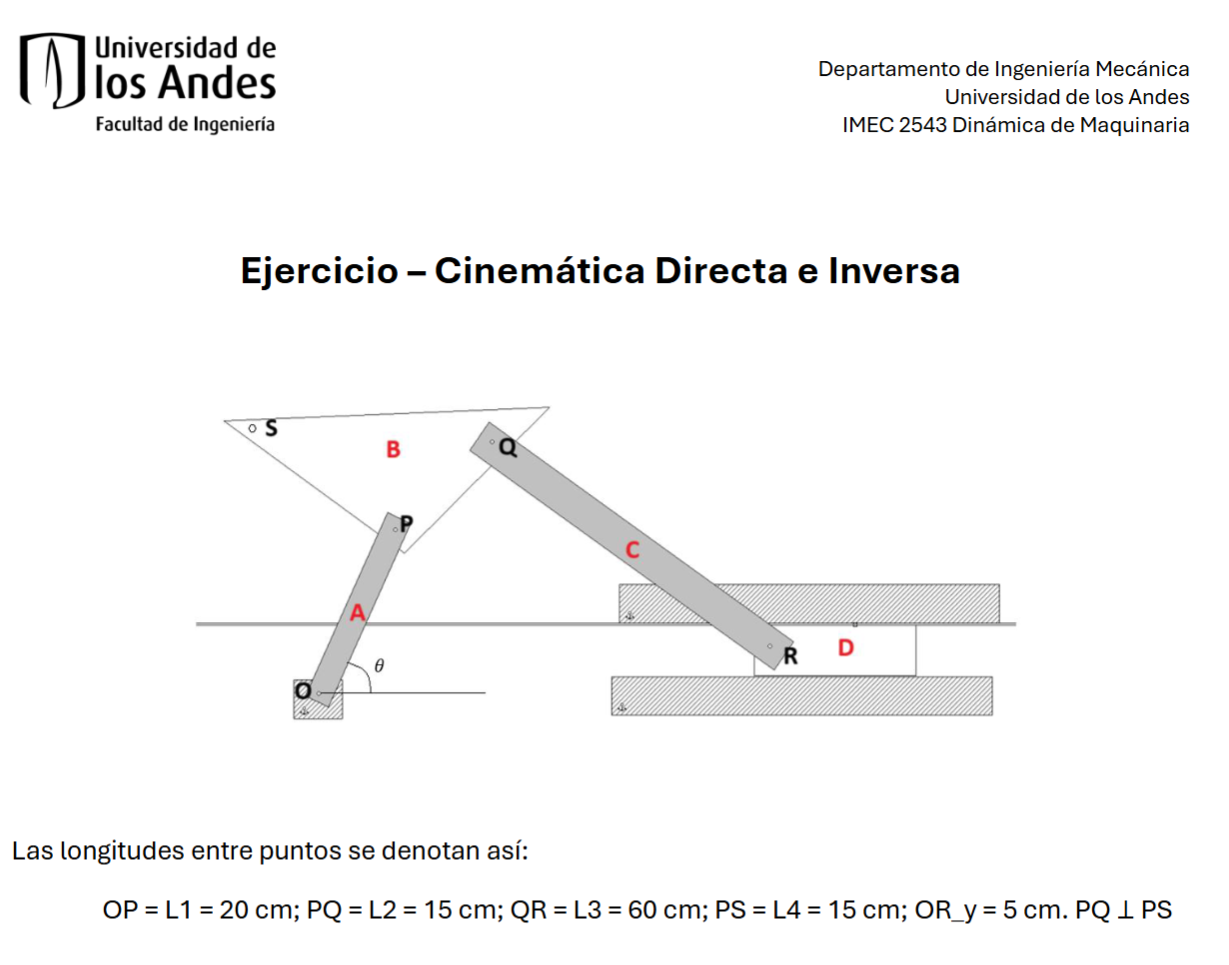
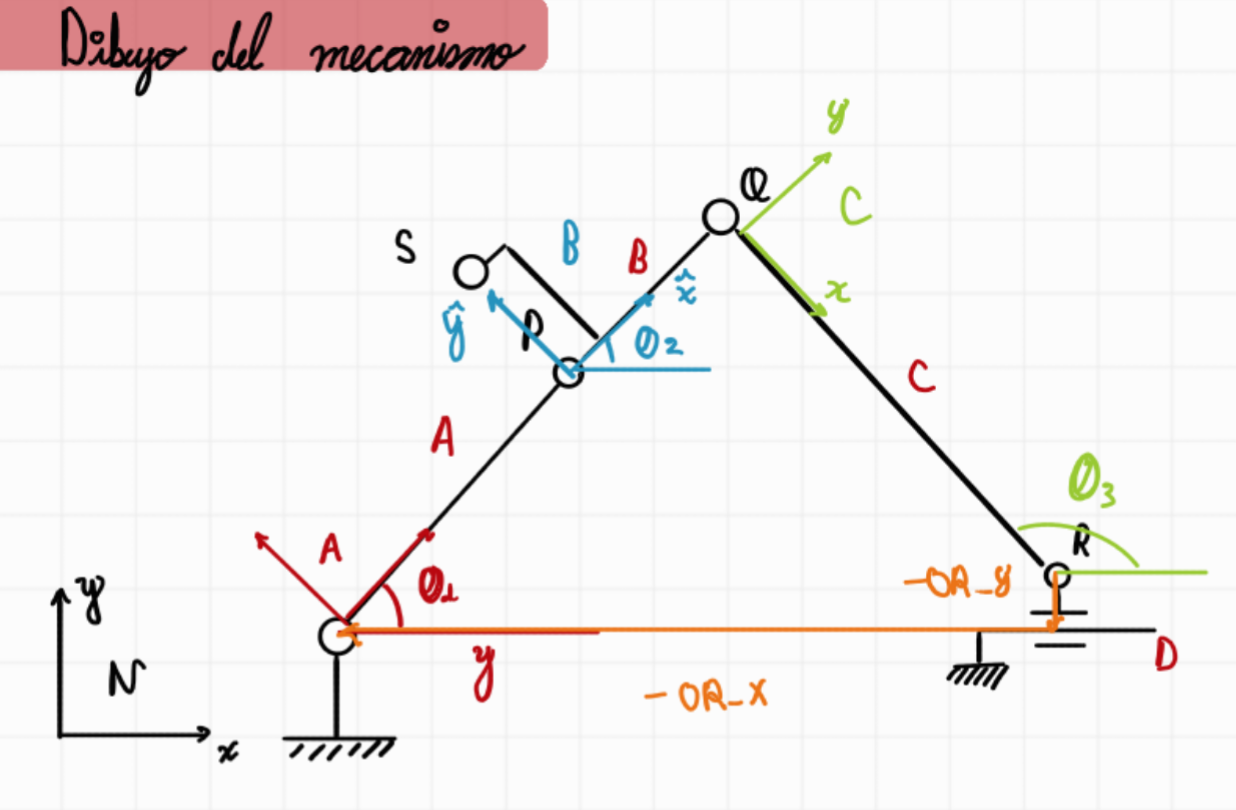

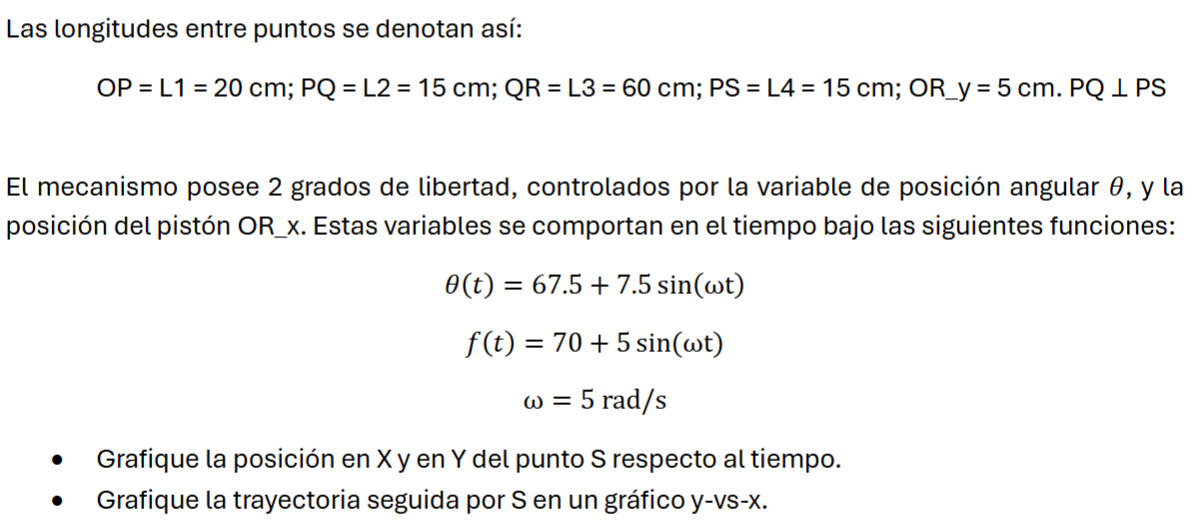

In [2]:
# Simbolos
L1, L2, L3, L4, OR_y, omega, t = symbols('L1 L2 L3 L4 OR_y omega t') 
# Simbolos dinámicos
theta1, theta2, theta3, theta4, OR_x = dynamicsymbols('theta1 theta2 theta3 theta4 OR_x')

# Definición de marcos de referencia
N = ReferenceFrame('N')
A = N.orientnew('N', 'Axis', [theta1, N.z])
B = N.orientnew('N', 'Axis', [theta2, N.z])
C = N.orientnew('N', 'Axis', [theta3-pi, N.z]) # <--- Tengo esta duda con el reference frame
# C = N.orientnew('N', 'Axis', [theta3, N.z])

# Mismo loop que el ejemplo de las 4 barras pero en este caso cerramos con un vector constante y el slider
eqLoop = A.x*L1 +B.x*L2 + C.x*L3 - N.y*OR_y - OR_x*N.x

# Expresamos todo en N
eq = eqLoop.express(N)

# Valores numéricos iniciales obtenidos de las funciones de theta1 y OR_x
val = {
    theta1: np.deg2rad(67.5),   # valor inicial
    OR_x: 70                    # posición inicial del pistón
}

# Parámetros numéricos del enunciado
params = {
    L1: 20,
    L2: 15,
    L3: 60,
    L4: 15,
    OR_y: 5
}

# Remplazo
eqnum = eq.subs(val).subs(params)

# Solución
sol = solve([eqnum.dot(N.x), eqnum.dot(N.y)], [theta2, theta3])
# La idea es resolver un sistema de dos ecuaciones (Ecuaciones x y y) con dos incógnitas (theta2 y theta3)
# Queremos resolver para thera2 y theta3 pues son los angulos desconocidos en este punto del movimiento

# sol = np.array(sol[0], dtype=float)
sol = np.array(sol[1], dtype=float)
# sol[0] accede a la primera solución, pues existe sol[1] que es la segunda
# además lo que hacemos es pasarlo a un array de numpy para facilitar todo



sol 

array([0.98693191, 2.69354007])

In [3]:
solve?

Signature: solve(f, *symbols, **flags)
Docstring:
Algebraically solves equations and systems of equations.

Explanation

Currently supported:
    - polynomial
    - transcendental
    - piecewise combinations of the above
    - systems of linear and polynomial equations
    - systems containing relational expressions
    - systems implied by undetermined coefficients

Examples

The default output varies according to the input and might
be a list (possibly empty), a dictionary, a list of
dictionaries or tuples, or an expression involving relationals.
For specifics regarding different forms of output that may appear, see :ref:`solve_output`.
Let it suffice here to say that to obtain a uniform output from
`solve` use ``dict=True`` or ``set=True`` (see below).

    >>> from sympy import solve, Poly, Eq, Matrix, Symbol
    >>> from sympy.abc import x, y, z, a, b

The expressions that are passed can be Expr, Equality, or Poly
classes (or lists of the same); a Matrix is considered to be a
lis

### Esto fue para buscar puntos de inicio con sentido

In [4]:
# Funciones dadas
theta = 67.5 + 7.5*sin(omega*t)      # grados
f = 70 + 5*sin(omega*t)              # cm

# Valor de omega
omega_val = 5

In [5]:
# Funciones numéricas
theta_fun = lambdify(t, theta.subs(omega, omega_val), 'numpy')
f_fun = lambdify(t, f.subs(omega, omega_val), 'numpy')


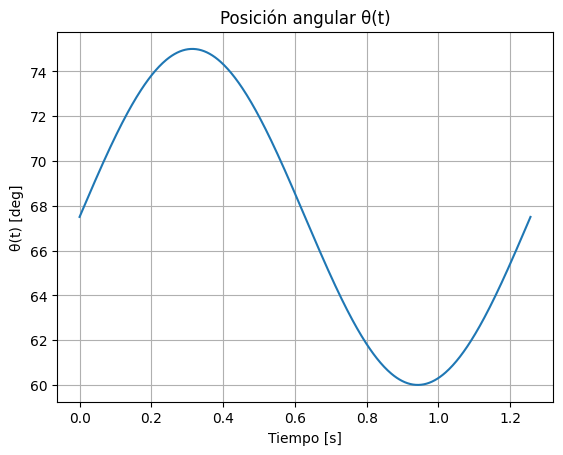

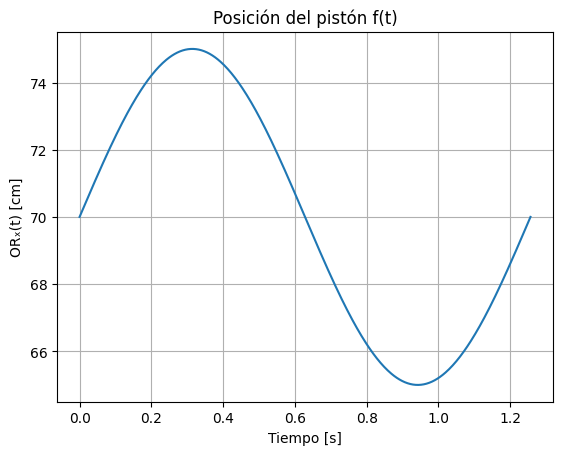

In [6]:
# Vector de tiempo
T = 2*np.pi/omega_val
t_vals = np.linspace(0, T, 500)

theta_vals = theta_fun(t_vals)
f_vals = f_fun(t_vals)

# Gráficas
plt.figure()
plt.plot(t_vals, theta_vals)
plt.xlabel('Tiempo [s]')
plt.ylabel('θ(t) [deg]')
plt.title('Posición angular θ(t)')
plt.grid()

plt.figure()
plt.plot(t_vals, f_vals)
plt.xlabel('Tiempo [s]')
plt.ylabel('ORₓ(t) [cm]')
plt.title('Posición del pistón f(t)')
plt.grid()

plt.show()


In [7]:
theta_0 = theta.subs({t:0})
f_0 = f.subs({t:0})

theta_0, f_0


(67.5000000000000, 70)

### Función numérica del loop

In [8]:
eqnum = eq.subs(params)

fun = lambdify(
    [theta1, theta2, theta3, OR_x],
    [eqnum.dot(N.x), eqnum.dot(N.y)],
)


### Barrido temporal 

In [9]:
omega = 5
# tt = np.linspace(0, 2*np.pi/omega, 1000)
tt = np.linspace(0, 2*np.pi, 1000)


theta1_list = np.deg2rad(67.5 + 7.5*np.sin(omega*tt))
ORx_list = 70 + 5*np.sin(omega*tt)

In [10]:
theta2_res = []
theta3_res = []

# "Semilla inicial" viene de la solución analítica
theta2_0, theta3_0 = sol 

# Luego adivinamos los valores iniciales para la primera iteración
guess = [theta2_0, theta3_0]

for th1, ORx in zip(theta1_list, ORx_list): # Aquí el zip es importante
    # Para cada par de valores (th1, ORx) en las listas correspondientes, 1 a 1

    # Definimos mi función
    def myfun(vars):
        return fun(th1, vars[0], vars[1], ORx)
    # La función fun espera argumentos separados [theta1, tehta2, theta3, ORx], sin embargo
    # el problema es que fsolve espera una función con un solo argumento (un array de variables)
    # Luego estre "wrapper" lo que hace es presisamente esto, pasarlo a lo que le gusta a fdolve
    
    # Ahora si podemos llamar a fsolve sobre myfun y pasarle el guess
    sol_num = optimize.fsolve(myfun, guess)

    # Añadimos el guess
    theta2_res.append(sol_num[0])
    theta3_res.append(sol_num[1])

    # Actualizamos el guess para que este cerca de la siguiente solución
    guess = sol_num


### Cálculos para S

In [11]:
# Vector OP
r_OP = L1*A.x

# Dirección PQ
u_PQ = B.x

# Expresar en el marco N
u_PQ_N = u_PQ.express(N)

# Componentes
ux = u_PQ_N.dot(N.x)
uy = u_PQ_N.dot(N.y)

# Dirección perpendicular (+90°)
u_PS = -uy*N.x + ux*N.y

# Posición de S
r_OS = r_OP + L4*u_PS


# Aquí solo hacemos un poquito de magia vectoríal para encontrar los vectores
# que nos "describen" la posición del punto de interes, que en este caso es S

In [12]:

# Expresamos r_OS y pasamos a valores numéricos
r_OS = r_OS.express(N).subs(params)

# Hacemos de esta función una función numérica
fun_S = lambdify(
    [theta1, theta2],
    [r_OS.dot(N.x), r_OS.dot(N.y)]
)


In [13]:
Sx = []
Sy = []

# Ahora para encontrar las coordenadas de S
# Iteramos por cada lista de valores de los ángulo y vamos remplazando
# Note que solo necesitamos los dos primeros ángulos para esto, pues es de estos que
# Depende la función de posición de S

for th1, th2 in zip(theta1_list, theta2_res):
    x, y = fun_S(th1, th2)
    Sx.append(x)
    Sy.append(y)


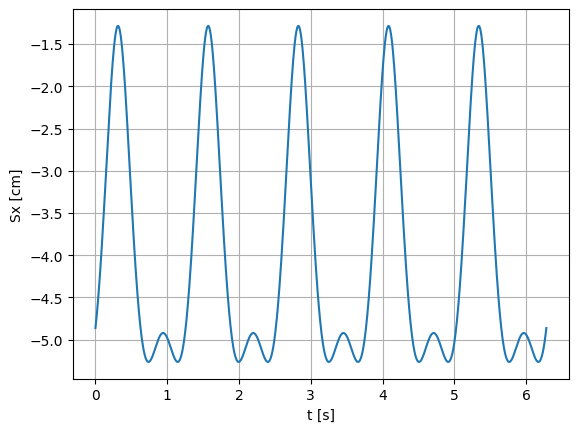

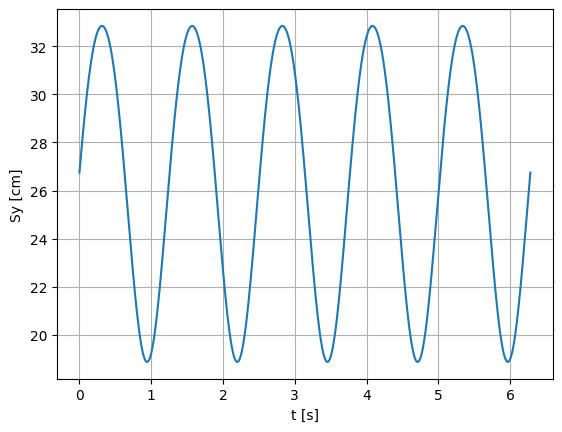

In [14]:
# ¡Graficamos!

plt.figure()
plt.plot(tt, Sx)
plt.xlabel('t [s]')
plt.ylabel('Sx [cm]')
plt.grid()

plt.figure()
plt.plot(tt, Sy)
plt.xlabel('t [s]')
plt.ylabel('Sy [cm]')
plt.grid()

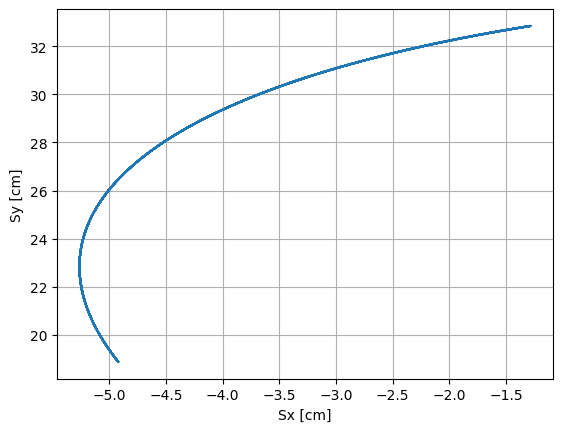

In [15]:
plt.figure()
plt.plot(Sx, Sy)
plt.xlabel('Sx [cm]')
plt.ylabel('Sy [cm]')
# plt.axis('equal')
plt.grid()
plt.show()


# Dinámica inversa
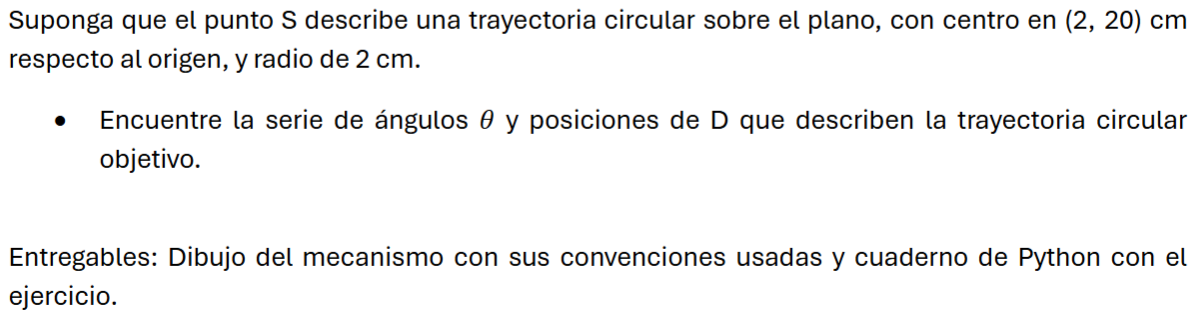

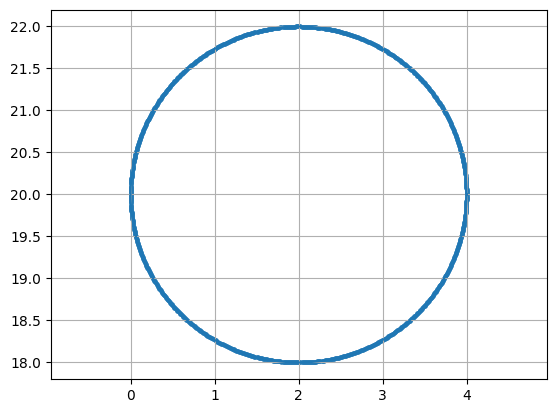

In [16]:
# Listo entonces lo primero es generar una lista de puntos para que podamos iterar

# Parámetros del círculo
xc, yc = 2, 20
r = 2

# Parámetro angular
theta = np.linspace(0, 2*np.pi, 1000)

# Listas de posiciones
x_list = xc + r*np.cos(theta)
y_list = yc + r*np.sin(theta)

# graficar
plt.figure()
plt.plot(x_list, y_list)
plt.scatter(x_list, y_list, s=5)
plt.axis('equal')
plt.grid()
plt.show()


In [17]:
p_target = np.array([22.0, 2.0])

def error_func(q):
    S = np.array(fun_S(q[0], q[1]), dtype=float)
    return np.sum((S - p_target)**2)

q0 = [np.deg2rad(45), np.deg2rad(45)]

res = optimize.minimize(
    error_func,
    q0,
    method='BFGS',
    tol=1e-10
)

q_sol = res.x
print("theta1, theta2 (deg):", np.rad2deg(q_sol))

theta1, theta2 (deg): [-36.18790049 -22.9889326 ]


In [18]:
theta1_res = []
theta2_res = []

q_guess = q_sol   # solución del primer punto

for x_d, y_d in zip(x_list, y_list):

    p_target = np.array([x_d, y_d])

    def error_func(q):
        S = np.array(fun_S(q[0], q[1]), dtype=float)
        return np.sum((S - p_target)**2)

    res = optimize.minimize(error_func, q_guess, method='BFGS')

    if not res.success:
        print("No converge en punto:", p_target)
        break

    q_guess = res.x
    theta1_res.append(q_guess[0])
    theta2_res.append(q_guess[1])

print(np.deg2rad(theta1_res))
print(np.deg2rad(theta2_res))

[0.01069492 0.01070159 0.01070832 0.01071511 0.01072196 0.01072888
 0.01073585 0.01074289 0.01074999 0.01075715 0.01076437 0.01077165
 0.01077898 0.01078638 0.01079383 0.01080135 0.01080892 0.01081654
 0.01082423 0.01083197 0.01083976 0.01084762 0.01085552 0.01086348
 0.0108715  0.01087957 0.01088769 0.01089586 0.01090409 0.01091237
 0.0109207  0.01092908 0.01093752 0.010946   0.01095453 0.01096312
 0.01097175 0.01098043 0.01098916 0.01099793 0.01100676 0.01101563
 0.01102454 0.01103351 0.01104252 0.01105157 0.01106067 0.01106981
 0.011079   0.01108823 0.0110975  0.01110681 0.01111617 0.01112557
 0.01113501 0.01114449 0.01115401 0.01116357 0.01117317 0.01118281
 0.01119248 0.0112022  0.01121195 0.01122174 0.01123157 0.01124143
 0.01125133 0.01126126 0.01127123 0.01128123 0.01129127 0.01130134
 0.01131145 0.01132158 0.01133175 0.01134195 0.01135218 0.01136244
 0.01137274 0.01138306 0.01139341 0.01140379 0.0114142  0.01142464
 0.01143511 0.0114456  0.01145612 0.01146666 0.01147724 0.0114

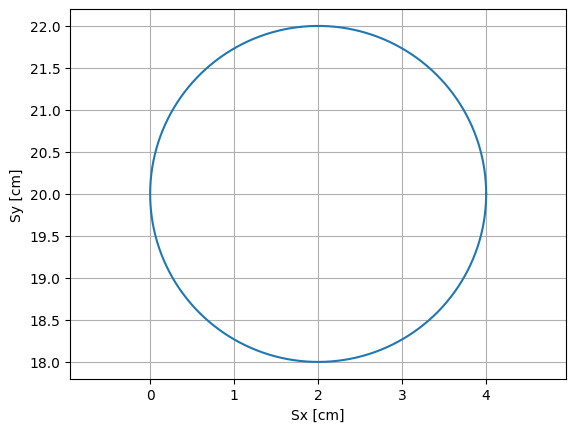

In [19]:
Sx = []
Sy = []

# Ahora para encontrar las coordenadas de S
# Iteramos por cada lista de valores de los ángulo y vamos remplazando
# Note que solo necesitamos los dos primeros ángulos para esto, pues es de estos que
# Depende la función de posición de S

for th1, th2 in zip(theta1_res, theta2_res):
    x, y = fun_S(th1, th2)
    Sx.append(x)
    Sy.append(y)
    
plt.figure()
plt.plot(Sx, Sy)
plt.xlabel('Sx [cm]')
plt.ylabel('Sy [cm]')
plt.axis('equal')
plt.grid()
plt.show()



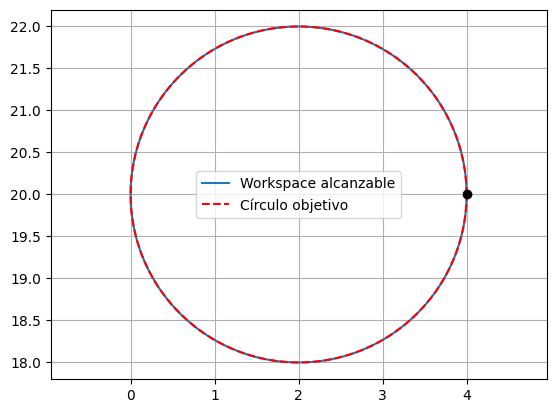

In [20]:
plt.figure()
plt.plot(Sx, Sy, label="Workspace alcanzable")
plt.plot(x_list, y_list, 'r--', label="Círculo objetivo")
plt.scatter([4], [20], color='k', zorder=5)
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()


In [21]:
import numpy as np
from scipy import optimize

def objective(q, p_target, w_loop=100.0):
    theta1, theta2, theta3, ORx = q

    # posición de S
    Sx, Sy = fun_S(theta1, theta2)
    err_S = np.array([Sx - p_target[0], Sy - p_target[1]])

    # cierre del loop
    loop_err = np.array(fun(theta1, theta2, theta3, ORx))

    # función objetivo
    J = err_S @ err_S + w_loop * (loop_err @ loop_err)
    return J


In [22]:
# punto objetivo
p_target = np.array([4.0, 20.0])

# guess inicial razonable
q0 = [
    np.deg2rad(60),
    np.deg2rad(40),
    np.deg2rad(-20),
    18.0
]

res = optimize.minimize(
    objective,
    q0,
    args=(p_target,),
    method='BFGS',
    options={'gtol':1e-9, 'disp':True}
)

q_sol = res.x
theta1, theta2, theta3, ORx = q_sol


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 59
         Function evaluations: 385
         Gradient evaluations: 77


In [ ]:
theta1_list = []
theta2_list = []
theta3_list = []
ORx_list = []

q_guess = q0

for px, py in zip(x_list, y_list):
    p_target = np.array([px, py])

    res = optimize.minimize(
        objective,
        q_guess,
        args=(p_target,),
        method='BFGS',
        options={
            'maxiter': 10000,     # ⬅ más iteraciones
            'gtol': 1e-10,       # ⬅ tolerancia del gradiente (más estricta)
            'disp': False
        }
)


    if not res.success:
        # print("No converge en:", p_target)
        # break

    q_sol = res.x

    theta1_list.append(q_sol[0])
    theta2_list.append(q_sol[1])
    theta3_list.append(q_sol[2])
    ORx_list.append(q_sol[3])

    # continuidad
    q_guess = q_sol


No converge en: [ 4. 20.]
No converge en: [ 3.99996044 20.01257887]
No converge en: [ 3.99984177 20.02515724]
No converge en: [ 3.99964399 20.03773461]
No converge en: [ 3.99936711 20.05031049]
No converge en: [ 3.99901114 20.06288438]
No converge en: [ 3.9985761  20.07545579]
No converge en: [ 3.998062  20.0880242]
No converge en: [ 3.99746885 20.10058914]
No converge en: [ 3.9967967 20.1131501]
No converge en: [ 3.99604555 20.12570658]
No converge en: [ 3.99521545 20.13825809]
No converge en: [ 3.99430642 20.15080413]
No converge en: [ 3.99331851 20.1633442 ]
No converge en: [ 3.99225174 20.17587782]
No converge en: [ 3.99110616 20.18840447]
No converge en: [ 3.98988182 20.20092368]
No converge en: [ 3.98857877 20.21343493]
No converge en: [ 3.98719706 20.22593774]
No converge en: [ 3.98573673 20.23843162]
No converge en: [ 3.98419786 20.25091606]
No converge en: [ 3.98258049 20.26339058]
No converge en: [ 3.9808847  20.27585468]
No converge en: [ 3.97911055 20.28830786]
No converge 

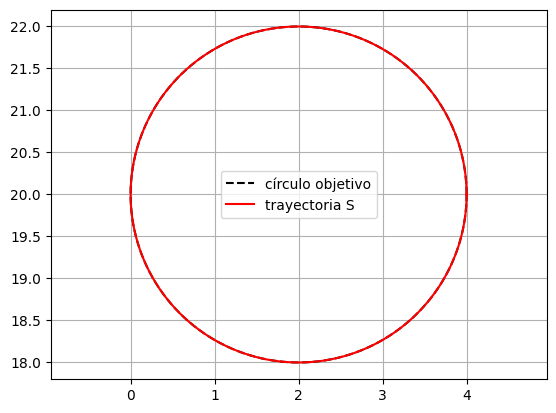

In [ ]:
Sx_res = []
Sy_res = []

for th1, th2 in zip(theta1_list, theta2_list):
    Sx, Sy = fun_S(th1, th2)
    Sx_res.append(Sx)
    Sy_res.append(Sy)

plt.figure()
plt.plot(x_list, y_list, 'k--', label='círculo objetivo')
plt.plot(Sx_res, Sy_res, 'r', label='trayectoria S')
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()
# Hola
